In [2]:
import numpy as np, scipy as sp, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import itertools
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    #http://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

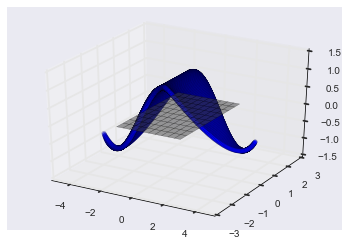

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')
u1 = np.linspace(-2,2,100)
u2 = np.linspace(-2,2,100)
X, Y = np.meshgrid(u1, u2)
#surf = ax.plot_surface(X+Y, np.sin(X), np.cos(X+Y))
surf2 = ax.plot_surface(X, Y, 0, color='grey', alpha=0.5)
surf = ax.scatter(X+Y, np.sin(X), np.cos(X+Y))

In [8]:
def plot_surface(f,plotmode='surface',urange=2*np.pi):
    u1 = np.linspace(-urange,urange,100)
    u2 = np.linspace(-urange,urange,100)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(u1, u2)
    Z = f(X,Y)
    surf2 = ax.plot_surface(X, Y, 0, color='grey', alpha=0.5)
    if plotmode == 'surface':
        surf = ax.plot_surface(*f(X,Y))
    elif plotmode == 'points':
        surf = ax.scatter(*f(X,Y))
    else:
        raise Exception('Unknown plot mode {p}'.format(p=plotmode))
    for (w1,w2) in itertools.permutations([-urange,-urange/2,0,urange/2,urange],2):
        x,y,z = f(w1,w2)
        a = Arrow3D([w1,x],[w2,y],[0,z], mutation_scale=20, 
                    lw=1, arrowstyle="-|>", color="r",
                   alpha=0.7,zorder=-1)
        ax.add_artist(a)

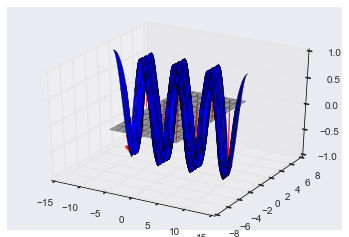

In [9]:
def f(X,Y):
    return X+Y, np.sin(X), np.cos(X+Y)
plot_surface(f)

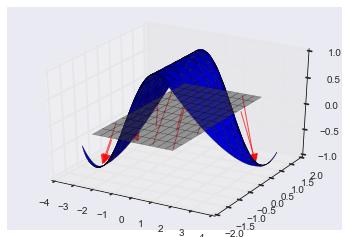

In [11]:
plot_surface(f,urange=2)

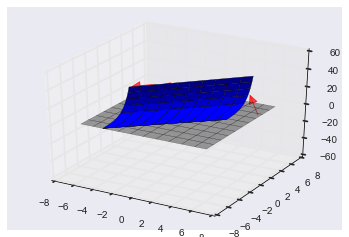

In [12]:
def f(X,Y):
    return X,np.log(Y),3*X+5*Y
plot_surface(f)

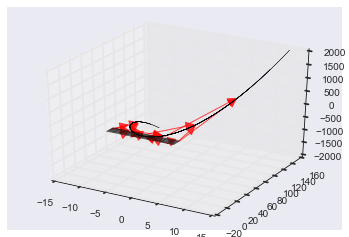

In [13]:
def f(X,Y):
    return X+Y, (X+Y)**2, (X+Y)**3
plot_surface(f)

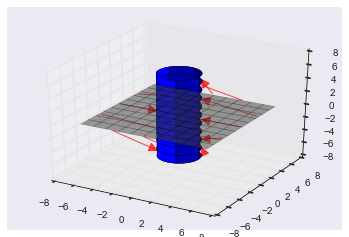

In [14]:
def f(X,Y):
    return 2*np.cos(X),2*np.sin(X),Y
plot_surface(f)

In [21]:
from ipywidgets import interact, fixed

In [52]:
def plot_surface_interpolate(f=f,plotmode='surface',urange=2*np.pi,interp=0.1,elev=None,azim=None):
    u1 = np.linspace(-urange,urange,100)
    u2 = np.linspace(-urange,urange,100)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    U1, U2 = np.meshgrid(u1, u2)
    X,Y,Z = f(U1,U2)
    U3 = np.zeros_like(Z)
    A = (1-interp)*U1 + interp*X
    B = (1-interp)*U2 + interp*Y
    C = (1-interp)*U3 + interp*Z
    surf2 = ax.plot_surface(U1, U2, 0, color='grey', alpha=0.5)
    if plotmode == 'surface':
        surf = ax.plot_surface(X,Y,Z,alpha=0.9,color='blue')
        surf3 = ax.plot_surface(A,B,C,color='green',zorder=-2,alpha=0.9)
    elif plotmode == 'points':
        surf = ax.scatter(X,Y,Z,alpha=0.9,color='blue')
        surf3 = ax.scatter(A,B,C,color='green',zorder=-2,alpha=0.9)
    else:
        raise Exception('Unknown plot mode {p}'.format(p=plotmode))
    
    for (w1,w2) in itertools.permutations([-urange,-urange/2,0,urange/2,urange],2):
        x,y,z = f(w1,w2)
        a = Arrow3D([w1,x],[w2,y],[0,z], mutation_scale=20, 
                    lw=1, arrowstyle="-|>", color="r",
                   alpha=0.7,zorder=-1)
        ax.add_artist(a)
    ax.view_init(elev=elev,azim=azim)

In [39]:
%matplotlib inline

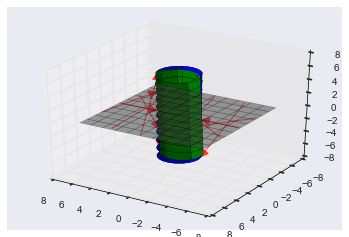

In [53]:
def plot_this(interp=0.1,azim=30,elev=30,plotmode='surface'):
    def f(X,Y):
        return 2*np.cos(X),2*np.sin(X),Y
    plot_surface_interpolate(f,interp=interp,azim=azim,elev=elev,plotmode=plotmode)
interact(plot_this,interp=(0,1,0.01),azim=(0,360,1),elev=(0,360,1),plotmode=['points','surface'])

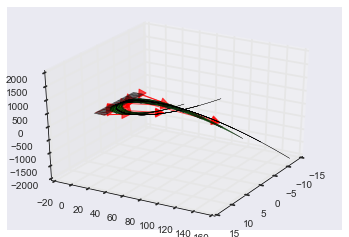

In [54]:
def plot_this(interp=0.1,azim=30,elev=30,plotmode='surface'):
    def f(X,Y):
        return X+Y, (X+Y)**2, (X+Y)**3
    plot_surface_interpolate(f,interp=interp,azim=azim,elev=elev,plotmode=plotmode)
interact(plot_this,interp=(0,1,0.01),azim=(0,360,1),elev=(0,360,1),plotmode=['points','surface'])